# Numerically solving the Schrödinger eauqtion

This notebook is to aid in numerically solving quantum mechanical problems, and more broadly, demonstrate some techniques for solving differential equations.

**Version**: 1.0  
**Created**: 19/07/2024 (AJM)  
**Updated**: 19/07/2024 (AJM)

There are many ways to skin a cat, and we are going to look at one of the most versitile cat skinning tools: solving an eigenvalue problem.

Here, we are going to look at finding the energy eigenstates for the sextic potential

$$
V(x) = \alpha x ^ 6
$$

## Step zero: import python modules

We are going to use *numpy* for calculations and *matplotlib.pyplot* for plotting. Import these as *np* and *plt* respectively.

In [1]:
# import numpy module
import numpy as np
# import matplotlib.pyplot module
import matplotlib.pyplot as plt

## Step one: define the parameters

We want to solve the for the wavefunction over a range of $x$ values, so let us definte these parameters. Note that we shall work in atomic (Hartree) units, to make life simpler.

In [57]:
# Definte the maximum and minimum x values
xmin, xmax = -5, 5
# Define the number of points at which we will solve the SE
N = 1000
# calculate the spacing of x values: (largest x value - minimum x value)/number of points - careful with endpoints!
dx = (xmax - xmin) / (N-1)

# generate a numpy array of x values: use np.linspace(start, stop, num)
x = np.linspace(xmin, xmax, N)
# Definte the potential coefficient
alpha = 1

# Definte the potential V(x) = alpha * x^6
V = alpha * (x ** 6)

## Step two: set up the Schrödinger equation

We are going to set up matrices for both the kinetic and potential terms, and then use these to find the eignevalues.

The potential matrix is simplest: it is diagonal as we have discretised our space in terms of $x$, and the potential acts only at the point $x$. We can use the function *np.diag(value)* to create a matrix with diagonal entries of value.

To construct the kinetic energy operator, that is, to discretise the operator, this can be done using finite diference method. For the second-order spatial derivative, we have:

$$
\left. \frac{d^2\psi}{dx^2}\right\rvert_{x_{i}} \approx \frac{\psi(x_{i+1}) - 2\psi(x_{i}) + \psi(x_{i-1})}{dx^2}
$$

This means that our matrix should have
* The diagonal elements $−2/dx^2$ which represent the contribution of $\psi(x_i)$ to the second derivative.
* The off-diagonal elements $1/dx^2$ which represent the contributions of $\psi(x_{i-1}$ and $\psi(x_{i+1})$ to the second derivative.

or explicitly, it should look like:

$$
T = -\frac{\hbar^2}{2m} \frac{1}{dx^2} \begin{pmatrix}
-2 & 1 & 0 & \cdots & 0 \\
1 & -2 & 1 & \cdots & 0 \\
0 & 1 & -2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & 1 \\
0 & 0 & 0 & 1 & -2
\end{pmatrix}
$$

To generate such a matrix, we can use list comprehension. Let us begin with a zeroed matrix - use *np.zeros((n,m))* to generate a $n \times m$ matrix with zeroed entries.

In [63]:
# Make an N x N matrix of zeroes: use np.zeros((n, m))
T = np.zeros((N, N))
# Loop over all values of N - the function range(N) may be useful - and set off diagonal elements and diagonal elements as above
for i in range(N):
    # Set off-diagonal elements, T[i, i-1] and T[i-1, i], to -1 / (2 * dx**2). 
    if i>0: # Be careful about the index - we don't want negative values
        T[i, i-1] = T[i-1, i] = -1 / (2 * dx**2)
    # Set diagonal elements T[i, i] to 1 / (dx**2). 
    T[i,i] = 1 / (dx**2)
# We can now write the Hamiltonian, H = T + V
H = T + np.diag(V)

## Step three: solve the Schrödinger equation

To find the eignevalues and eigenvectors of our system, we can use the function *np.linalg.eigh(M)*. It is really that simple!

In [64]:
eigenvalues, eigenvectors = np.linalg.eigh(H)

## Step four: Plot the Eigenvectors

We can now use the standard *matplotlib* routines to produce a plot of eigenfunctions. Let's plot the first three:

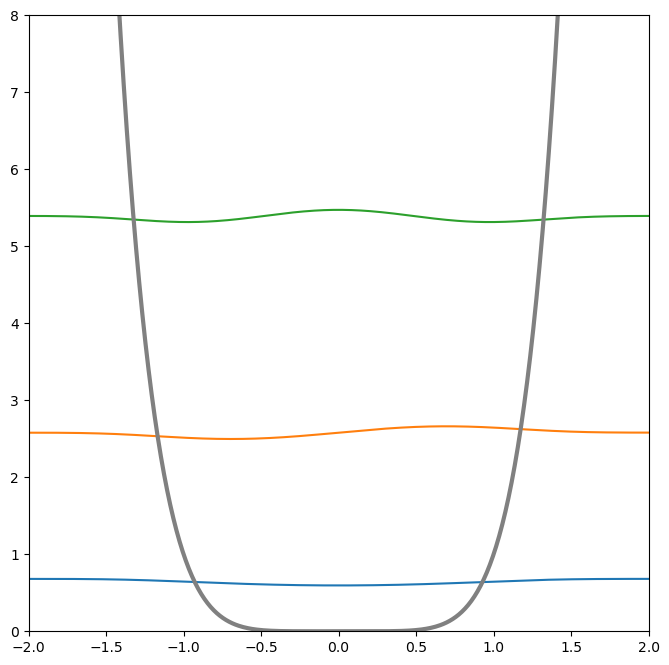

In [67]:
# Plot the first three eigenstates
fig, ax = plt.subplots(figsize=(8, 8))

# loop over the eigenfunctions
for n in range(3):
    # Plot the eigenfunction
    line, = ax.plot(x, eigenvectors[:, n] + eigenvalues[n])

# Plot the eigenfunction
ax.plot(x, V, color = 'gray', linewidth = 3)

ax.set_ylim(0,8)
ax.set_xlim(-2,2)

plt.show()

---

## Made to look pretty

This is the exact same code as above, just with a few teaks to make it look pretty!

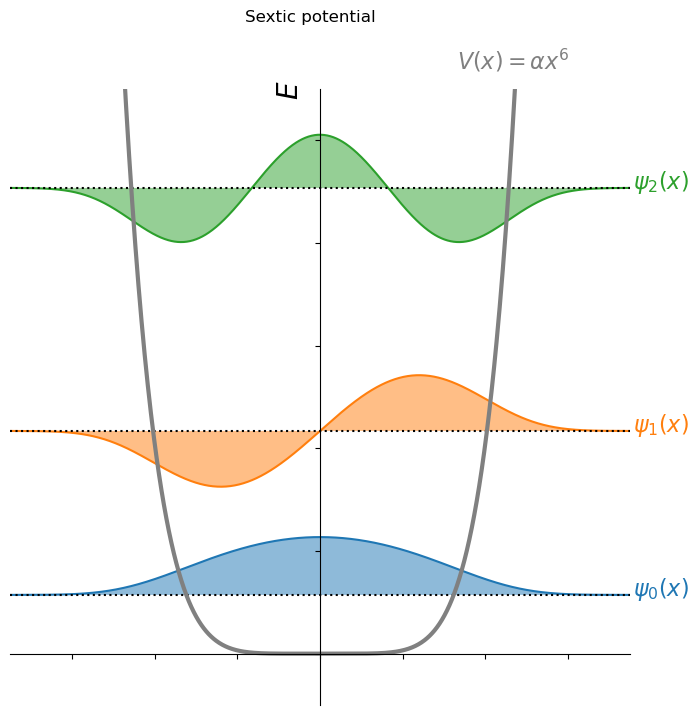

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 5e-5  # Potential coefficient
xmin, xmax = -7.5, 7.5  # Range for x
N = 1000  # Number of points
dx = (xmax - xmin) / (N - 1)
x = np.linspace(xmin, xmax, N)

# Potential function V(x)
V = alpha * x**6

# Kinetic energy operator (discretized)
T = np.zeros((N, N))
for i in range(N):
    if i > 0:
        T[i, i-1] = T[i-1, i] = -1 / (2 * dx**2)
    T[i, i] = 1 / dx**2

# Hamiltonian H = T + V
H = T + np.diag(V)

# Solve for eigenvalues and eigenvectors using numpy
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Ensure the ground state wavefunction is mostly positive
for n in range(3):
    if eigenvectors[N//2, n] < 0:
        eigenvectors[:, n] = -eigenvectors[:, n]

# Plot the first three eigenstates
fig, ax = plt.subplots(figsize=(8, 8))

for n in range(3):
    line, = ax.plot(x, eigenvectors[:, n] + eigenvalues[n])
    ax.text(x[len(x)-1]*1.1, eigenvalues[n], r'$\psi_{} (x)$'.format(n),
             horizontalalignment='center', fontsize=16, color = line.get_color())

    ax.hlines(eigenvalues[n], x[0], x[len(x)-1], linestyles='dotted', colors='k')
    ax.fill_between(x, eigenvalues[n], eigenvectors[:, n] + eigenvalues[n], alpha=0.5)
    
ax.plot(x, V, color = 'gray', linewidth = 3)
ax.text(xmax/1.6, .57, r'$V(x)=\alpha x^6$', horizontalalignment='center', fontsize=16, color = 'gray')

# # Set the x and y limits
ax.set_ylim((-.05,.55))
ax.set_xlim((xmin, xmax))

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position(('data', 0.0))

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Eliminate x and y axes labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Set y label
ax.set_ylabel('$E$', fontsize=20)
ax.yaxis.set_label_coords(0.475,1)

# Adding a title to the figure
fig.suptitle('Sextic potential')

plt.show()

---

## Euler

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 1.0  # Potential coefficient
xmin, xmax = -5, 5  # Range for x
N = 1000  # Number of points
dx = (xmax - xmin) / (N - 1)
x = np.linspace(xmin, xmax, N)

# Potential function V(x)
V = a * x**6

# Euler Method to solve the Schrödinger equation
def euler(E, dx, V):
    psi = np.zeros(N)
    psi[1] = 1e-5  # small non-zero value to start the integration
    dpsi = np.zeros(N)  # derivative of psi
    dpsi[0] = 1e-5  # initial derivative

    for i in range(1, N-1):
        d2psi = 2 * (V[i] - E) * psi[i]
        dpsi[i+1] = dpsi[i] + d2psi * dx
        psi[i+1] = psi[i] + dpsi[i] * dx
    
    return psi

# Function to normalize the wavefunction
def normalize(psi, dx):
    norm = np.sqrt(np.sum(psi**2) * dx)
    return psi / norm

# Finding the first three energy eigenstates
energies = []
wavefunctions = []

for n in range(3):
    E = n + 0.5  # initial guess for the energy eigenvalue
    for _ in range(1000):  # iterate to refine the energy eigenvalue
        psi = euler(E, dx, V)
        if psi[-1] * psi[-2] < 0:  # change sign of E if boundary condition is not met
            E += 0.001
        else:
            E -= 0.001

    psi = normalize(psi, dx)
    energies.append(E)
    wavefunctions.append(psi)

# Plotting the first three energy eigenstates
plt.figure(figsize=(12, 8))
for n in range(3):
    plt.plot(x, wavefunctions[n], label=f'n={n}, E={energies[n]:.2f}')
plt.xlabel('x')
plt.ylabel('ψ(x)')
plt.title('First three energy eigenstates using Euler method')
plt.legend()
plt.grid(True)
plt.show()

## Runge-Kutta Method

C:\Users\ajm32\AppData\Local\Temp\ipykernel_12136\1316484504.py:39: RuntimeWarning: overflow encountered in scalar multiply
  if psi[-1] * psi[-2] < 0:  # change sign of E if boundary condition is not met
C:\Users\ajm32\AppData\Local\Temp\ipykernel_12136\1316484504.py:28: RuntimeWarning: overflow encountered in square
  norm = np.sqrt(np.sum(psi**2) * dx)


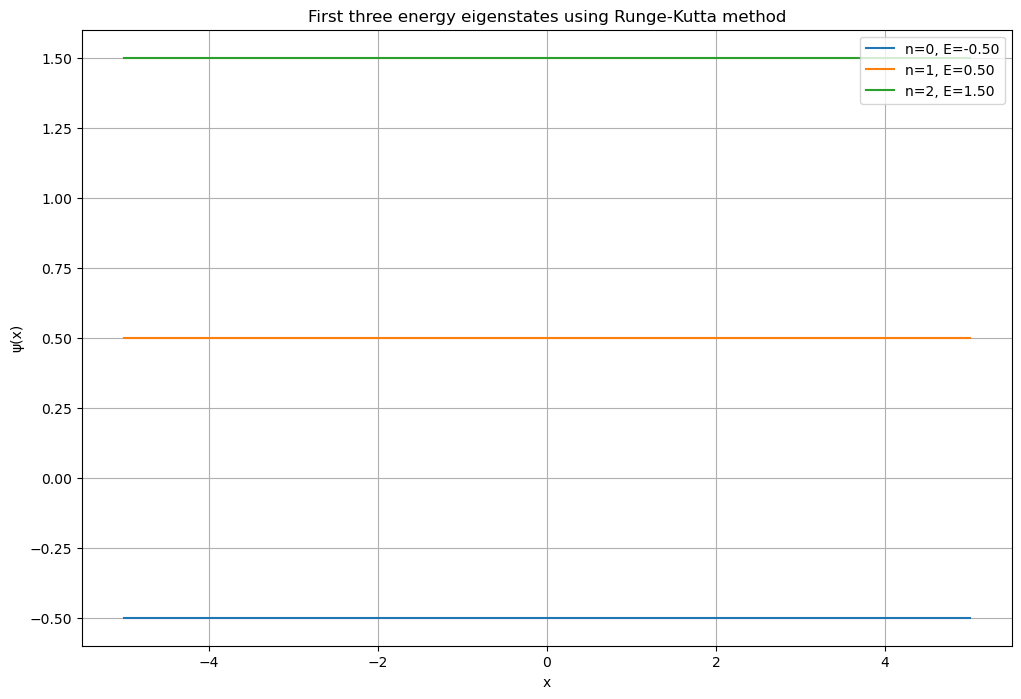

In [62]:
# Runge-Kutta Method to solve the Schrödinger equation
def runge_kutta(E, dx, V):
    psi = np.zeros(N)
    phi = np.zeros(N)
    psi[1] = 1e-5  # small non-zero value to start the integration
    phi[0] = 1e-5  # initial derivative value

    for i in range(1, N-1):
        k1_psi = phi[i]
        k1_phi = 2 * (V[i] - E) * psi[i]

        k2_psi = phi[i] + 0.5 * k1_phi * dx
        k2_phi = 2 * (V[i+1] - E) * (psi[i] + 0.5 * k1_psi * dx)

        k3_psi = phi[i] + 0.5 * k2_phi * dx
        k3_phi = 2 * (V[i+1] - E) * (psi[i] + 0.5 * k2_psi * dx)

        k4_psi = phi[i] + k3_phi * dx
        k4_phi = 2 * (V[i+2] - E) * (psi[i] + k3_psi * dx)

        psi[i+1] = psi[i] + (dx / 6) * (k1_psi + 2*k2_psi + 2*k3_psi + k4_psi)
        phi[i+1] = phi[i] + (dx / 6) * (k1_phi + 2*k2_phi + 2*k3_phi + k4_phi)
    
    return psi

# Function to normalize the wavefunction
def normalize(psi, dx):
    norm = np.sqrt(np.sum(psi**2) * dx)
    return psi / norm

# Finding the first three energy eigenstates
energies = []
wavefunctions = []

for n in range(3):
    E = n + 0.5  # initial guess for the energy eigenvalue
    for _ in range(1000):  # iterate to refine the energy eigenvalue
        psi = runge_kutta(E, dx, V)
        if psi[-1] * psi[-2] < 0:  # change sign of E if boundary condition is not met
            E += 0.001
        else:
            E -= 0.001

    psi = normalize(psi, dx)
    energies.append(E)
    wavefunctions.append(psi)

# Plotting the first three energy eigenstates
plt.figure(figsize=(12, 8))
for n in range(3):
    plt.plot(x, wavefunctions[n], label=f'n={n}, E={energies[n]:.2f}')
plt.xlabel('x')
plt.ylabel('ψ(x)')
plt.title('First three energy eigenstates using Runge-Kutta method')
plt.legend()
plt.grid(True)
plt.show()